## Projeto de Parceria - *EBAC*

### Introdução

O projeto surge da seguinte afirmação: "Encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning. A ideia do projeto é explanar e justificar a relevância do uso de dados para descobrir a solução."

Pensando em como justificar a relevância do uso de dados, fiz algumas pesquisas e encontrei uma problemática que através do uso dos dados, pode trazer uma agilidade necessária para salvar vidas, explico melhor abaixo, onde apresento a coleta de dados.

## Coleta de dados

A Universidade da Califórnia Irvine possui um repositório de Machine Learning contendo alguns datasets de livre acesso para treinamento e estudo. Dentre estes, encontrei um que pode ser utilizado para apresentar meus argumentos em favor da relevância da cultura "data driven" na busca por soluções práticas.

O dataset em questão contém dados sobre pacientes na cidade de Cleveland, onde as variáveis que são dados sobre a saúde dos pacientes, atentam para a possibilidade de doenças coronárias. Os dados são de 1988.

Deixo aqui também o link da fonte. [https://archive.ics.uci.edu/dataset/45/heart+disease]

Para reforçar meu argumento, deixo aqui também um link contendo algumas das citações de um artigo escrito em 1989 propondo o uso de algoritmos para facilitar o diagnóstico de doenças coronárias. [https://www.semanticscholar.org/paper/International-application-of-a-new-probability-for-Detrano-J%C3%A1nosi/a7d714f8f87bfc41351eb5ae1e5472f0ebbe0574]

A presença de inúmeros artigos científicos dentro da medicina é também um forte indício do poder que o uso de um algoritmo bem treinado tem sobre a agilidade de diagnóstico e tratamento de pacientes. 

Mas vamos partir para a tratativa dos dados e a organização de um modelo de predição treinado com os dados do dataset.

## Análise dos dados

### Tipos e relevância

Aqui vou organizar todas as informações acerca dos dados, como estão organizados, quais variáveis são mais relevantes para o treino dos modelos e como elas se organizam entre si.

In [45]:
# Importar bibliotecas e arquivos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz


df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/heart-disease-cleveland.csv')

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Primeiro acho relevante dar a legenda das informações e sua relevância.

A primeira coluna de nome **"age"** contém os dados da idade do paciente. A idade é diretamente proporcional à probabilidade de se desenvolver doença coronária. Trabalhando com 'int64', é uma variável numérica.

A segunda coluna de nome **"sex"** contém os dados do gênero do paciente, onde 1 é homem e 0 é mulher. Variável categórica.

Na terceira coluna temos **"cp"** que significa "Chest Pain". 1 significa "Angina típica", 2 para "Angina Atípica", 3 para "Dor não anginosa", e 4 para "Assintomático". Angina é um tipo de dor no peito causada pela redução do fluxo sanguíneo para o coração.

Na quarta coluna temos **"trestbps"** que quer dizer "Resting Blood Pressure", ou seja, a pressão arterial em repouso do paciente, medida aqui em mm/Hg(Milímetro de mercúrio). Valores acima de 140 representam um princípio de hipertensão. Aqui também em 'int64', temos outra variável numérica.

Na quinta coluna temos **"chol"** que atesta para o colesterol sérico, uma média dos valores dos colesteróis do corpo. São esperados valores entre 190 e 210. Aqui trabalhando também com uma variável numérica em 'int64'.

Na sexta coluna temos **"fbs"** que atesta para "Fasting blood sugar", ou seja, o nível de açúcar no sangue medido em jejum. Aqui temos uma variável categórica, onde 1 quer dizer Verdadeiro e 0 quer dizer falso. A ideia é categorizar pacientes pré-diabéticos (fbs > 120).

Na sétima coluna temos **"restecg"** que significa "Rest ECG", os resultados eletrocardiográficos em repouso. Aqui outra variável categórica, onde 0 indica resultados normais, 1 significa distorções das ondas dos resultados(requer mais testes), enquanto 2 significa hipertrofia ventricular provável ou definitiva.

Na oitava coluna temos **"thalach"** que nos aponta o valor máximo atingido pela frequência cardíaca durante exames. Geralmente se utiliza da média 220(homens) ou 226(mulheres) decrescido da idade para chegar neste valor, que aqui apresenta uma variável numérica também em 'int64'.

Na nona coluna temos **"exang"** que nos mostra se o paciente teve angina induzida por exercício. Uma variável categórica onde 1 é Verdadeiro e 0 é Falso.

Na décima coluna temos **"oldpeak"** é uma variável mais específica, que apresenta a intensidade da depressão do segmento ST induzida pelo exercício em relação ao repouso. ST é uma variável obtida durante o eletrocardiograma. Aqui temos uma variável numérica em 'float'.

Na décima primeira coluna temos **"slope"** é outra variável relacionada aos resultados do segmento ST no eletrocardiograma. Uma variável categórica onde 1 indica uma inclinação ascendente, 2 um plano e 3 uma inclinação descendente, sendo este um fator frequentemente associado a cardiopatias.

Na décima segunda coluna temos **"ca"** que nos mostra quantos vasos principais(0-3) apresentam algum tipo de estreitamento ou bloqueio. Uma variável categórica em 'float'. Quanto maior o número, mais significativo é o comprometimento do fluxo sanguíneo.

Na décima terceira coluna temos **"thal"** que refere-se a talassemia, uma condição genética que afeta o sangue. Aqui temos uma variável categórica em 'float' onde 3 aponta normalidade, 6 indica algum defeito fixo no músculo cardíaco e 7 um defeito reversível provavelmente causado por uma isquemia.

Na décima quarta coluna temos **"diagnosis"** temos uma variável categórica em 'int64' que oferece um "diagnóstico" com base nos valores de estreitamento dos vasos. 0 indica valores de estreitamento menores que 50%. 1 apresenta valores maiores que 50% e acima apresentam quadros graves de estreitamento ou bloqueio.

### Análise exploratória

A ideia aqui é carregar o dataframe, analisar, avaliar e identificar os dados. Com essas informações em mente, podemos ordenar, tratar e selecionar as melhores correlações.

In [36]:
# Descrever as estatísticas básicas
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope   diagnosis  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [37]:
# Verificar a presença de valores nulos
print(df.isnull().sum())

age           0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalach      0
 exang        0
 oldpeak      0
 slope        0
 ca           0
 thal         0
 diagnosis    0
dtype: int64


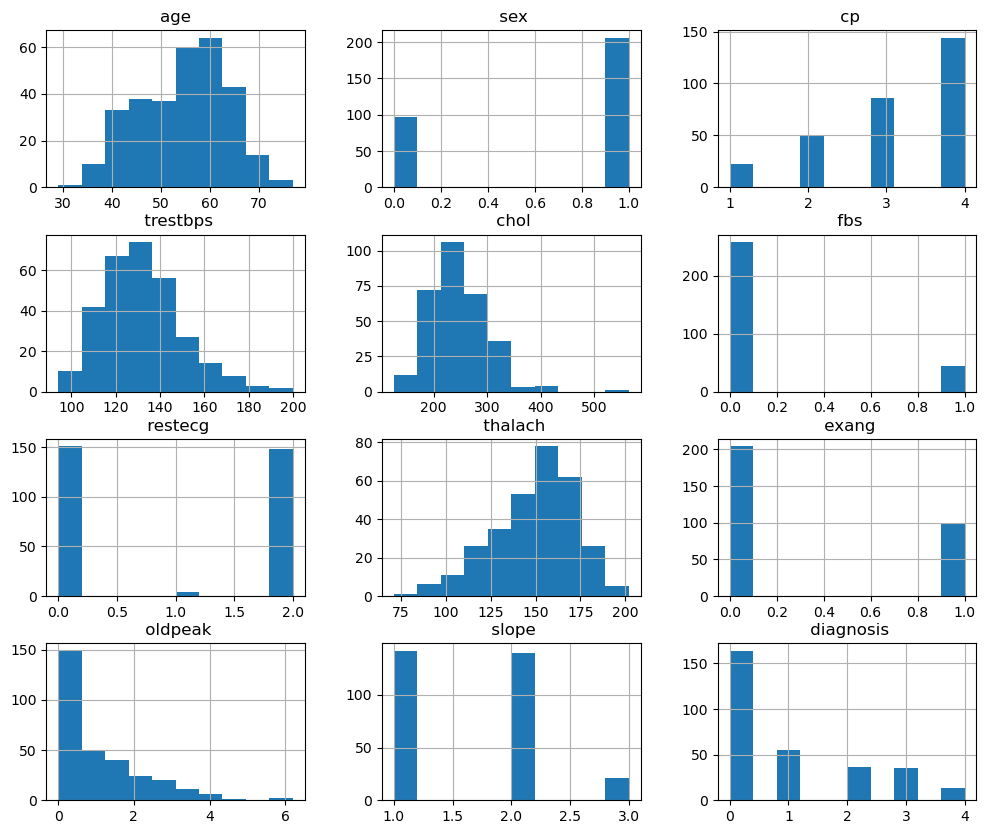

In [38]:
# Analisar a distribuição das variáveis
df.hist(figsize=(12, 10))
plt.show()

In [39]:
# Tratamento dos dados
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


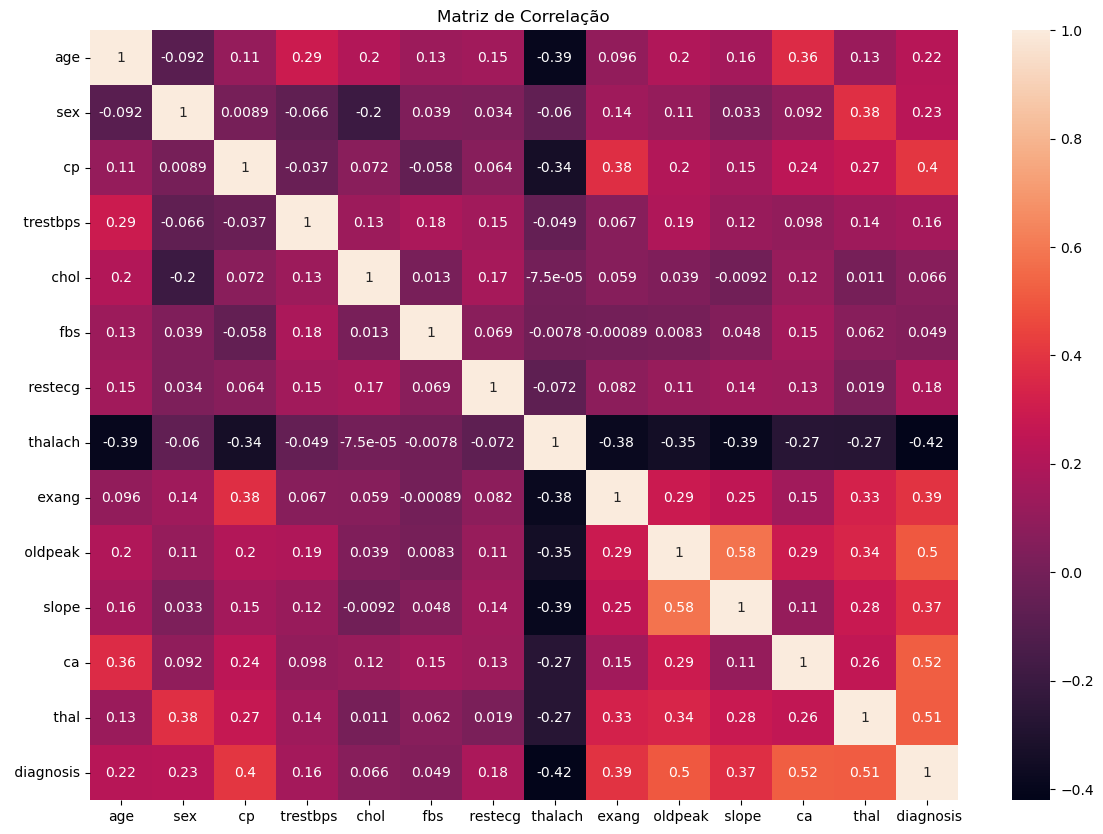

In [40]:
# Análise de correlação
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlação')
plt.show()

In [41]:
# Identificação de variáveis relevantes
print(correlation_matrix[' diagnosis'].sort_values(ascending=False))

 diagnosis    1.000000
 ca           0.521178
 thal         0.513377
 oldpeak      0.501461
 cp           0.404248
 exang        0.391613
 slope        0.374689
 sex          0.226797
age           0.222156
 restecg      0.184136
 trestbps     0.159620
 chol         0.066448
 fbs          0.049040
 thalach     -0.420639
Name:  diagnosis, dtype: float64


### Observações finais acerca da análise exploratória

Depois de organizar os dados, seguindo a indicação do tutor, trouxe um gráfico de correlação para retirar as colunas que não "ajudavam" o modelo em suas predições. Depois de feito, identifiquei que as variáveis ('ca', 'thal', 'oldpeak', 'cp', 'exang', 'slope', 'sex', 'age') foram aquelas com maior percentual na matriz de correlação. Dessa forma, a ideia passou a ser retirá-las na hora de treinar os modelos. 

Com isso em mente, o próximo passo passou a ser reescrever todos os passos de treino e teste dos modelos. 

## Modelo Preditivo

### Organização dos modelos - Treino e teste

In [43]:
# Selecionar variáveis correlacionadas
selected_features = [' ca', ' thal', ' oldpeak', ' cp', ' exang', ' slope', ' sex', 'age']

# Dividir os dados em conjuntos de treinamento e teste
x = df[selected_features]
y = df[' diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Aqui, por conta da base de dados pequena, decidi colocar em 80-20, temendo um baixo número nos testes avaliativos.

In [50]:
# Treinar os modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


Aqui um adendo. No modelo anterior, tentei utilizar o Linear Regression, mas não obtive bons resultados, pois a variável resposta é uma categórica que provém de outras variáveis categóricas. Dessa forma, busquei alternativas e vi que o Logistic Regression poderia me oferecer melhores resultados.

In [51]:
# Avaliar os modelos
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}\n")

Model: Logistic Regression
Accuracy: 0.6
Precision: 0.536449864498645
Recall: 0.6
F1 Score: 0.5657675657675657

Model: Random Forest
Accuracy: 0.6166666666666667
Precision: 0.5147727272727273
Recall: 0.6166666666666667
F1 Score: 0.5602941176470588

Model: Decision Tree
Accuracy: 0.6
Precision: 0.603495115995116
Recall: 0.6
F1 Score: 0.5979513444302176



Um resumo do que observei com os testes de avaliação

**Random Forest** possui a maior acurácia, mas com precisão ligeiramente menor.

**Árvore de Decisão** tem a melhor combinação de precisão, recall e F1 Score, proporcionando um bom equilíbrio geral.

**Regressão Logística** apresenta as piores métricas, embora os resultados estejam próximos, o que a torna uma opção válida.

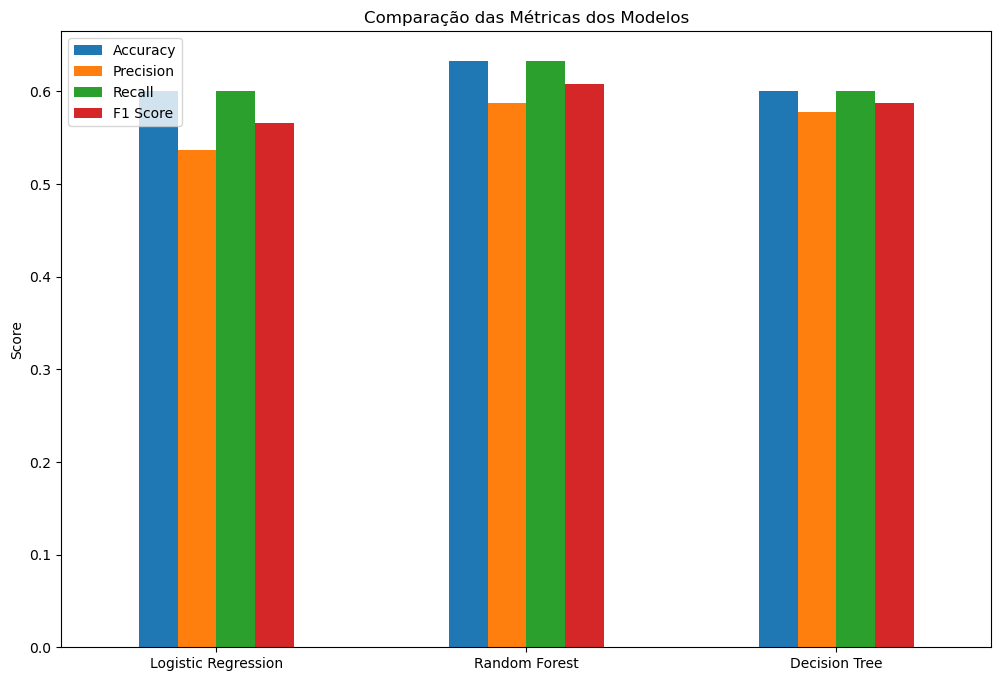

In [61]:
# Avaliar os modelos e apresentar em um gráfico
metrics = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    metrics.loc[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ]

ax = metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Comparação das Métricas dos Modelos')
plt.ylabel('Score')

# Ajustar a orientação dos rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

### Teste

A ideia por trás do teste era trazer algum paciente aleatório para julgar qual deveria ser a prioridade para o atendimento de tal paciente baseado no grau de severidade e da possibilidade de coronopatias logo na triagem. Pode ser transformado em um programa com interface gráfica, no entanto os números de acurácia ainda estão baixos demais para se tornar válido. Sinto que preciso de mais dados para treinar melhor os modelos, mas o dataset possui uma base muito pequena.

In [63]:
# Apresentação do cabeçalho do teste de modo a facilitar a ordenação manual da array seguinte

x

,ca,thal,oldpeak,cp,exang,slope,sex,age
0,0.0,6.0,2.3,1,0,3,1,63
1,3.0,3.0,1.5,4,1,2,1,67
2,2.0,7.0,2.6,4,1,2,1,67
3,0.0,3.0,3.5,3,0,3,1,37
4,0.0,3.0,1.4,2,0,1,0,41
...,...,...,...,...,...,...,...,...
297,0.0,7.0,0.2,4,1,2,0,57
298,0.0,7.0,1.2,1,0,2,1,45
299,2.0,7.0,3.4,4,0,2,1,68
300,1.0,7.0,1.2,4,1,2,1,57


In [64]:
# Organização da array com os dados de um paciente aleatório, bem como utilização do modelo treinado para predição do risco de doença coronária

new_p = np.array([0.0, 3, 0.3, 1, 0, 2, 1, 60])
# Predição junto da apresentação do primeiro valor da array, acessado pelo indice 0

c_d = model.predict(new_p.reshape(1, -1))
predicted_pacient = c_d[0]
print(f'O grau de risco para doença coronária do paciente é {predicted_pacient}')

O grau de risco para doença coronária do paciente é 1


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


O resultado final não foi o esperado por mim. Esperava encontrar um nível de acurácia maior para poder transformar o projeto em uma interface gráfica simples e útil. Não sei se foi sobre a qualidade dos dados aferidos, visto que são de 1988. Não sei se o tamanho da minha amostra foi insuficiente para um treinamento bem sucedido. Não sei se usar média e desvio padrão nos valores seria um caminho para gerenciar os dados, embora estes já fossem próximos uns dos outros e julguei desnecessário. Eu já suspeitava disso quando encontrei valores muito baixos na matriz de correlação. Ou talvez outro modelo seja o melhor caminho para obter melhores resultados. Vou ficar alimentando essa dúvida por enquanto, até ter o conhecimento necessário pra resolver esses problemas. 

## Conclusão

A utilização de modelos de predição visando agilizar e automatizar processos representa um grande ganho quando se trata de pacientes de doenças graves, onde o tempo é tão importante. Aqui organizei um modelo de predição com muitas variáveis categóricas, onde a variável resposta era ordinal. Um bom exercício, onde tentei apresentar alguns modelos diferentes, para avaliar como cada um deles lida com os tipos de variáveis. Que este projeto seja de valia para minha evolução enquanto profissional da área de dados.